In [105]:
# install libraries
# !pip install pandas numpy scikit-learn matplotlib seaborn

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")


In [107]:
def plot_conf_matrix(conf_matrix, name=""):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

def plot_roc_curve(fpr, tpr, auc, name=""):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend()
    plt.show()

In [109]:
def train_models(X_train, X_test, y_train, y_test, dataset_name="", use_grid=False):
    models = {
        "Logistic Regression": {
            "model": LogisticRegression(),
            "params": {
                "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                "penalty": ["l1", "l2"],
                "solver": ['liblinear', 'saga']
            }
        },
        "Naive Bayes": {
            "model": GaussianNB(),
            "params": {
                "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
            }
        },
        "k-NN": {
            "model": KNeighborsClassifier(),
            "params": {
                'n_neighbors': list(range(1, 21))
            }
        }
    }

    for name, model_info in models.items():
        model = model_info["model"]
        model.fit(X_train, y_train)

        if use_grid:
            params = model_info["params"]
            grid = GridSearchCV(model, params, cv=5, scoring='accuracy')
            grid.fit(X_train, y_train)
            print('=' * 50)
            print(f"Best parameters for {name}: {grid.best_params_}")
            print(f"Best score for {name}: {grid.best_score_}")
            best_model = grid.best_estimator_
            best_model.fit(X_train, y_train)
            y_pred = best_model.predict(X_test)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # Calc metrics
        y_probs = model.predict_proba(X_test)[:, 1]
        conf_matrix = confusion_matrix(y_test, y_pred)
        fpr, tpr, thresholds = roc_curve(y_test, y_probs)
        auc = roc_auc_score(y_test, y_probs)

        # Plot confusion matrix
        plot_conf_matrix(conf_matrix, name)

        # Plot ROC and AUC
        plot_roc_curve(fpr, tpr, auc, name)

        print(f"=== {name} ({dataset_name}) ===")
        print(classification_report(y_test, y_pred))
        print("-" * 50)


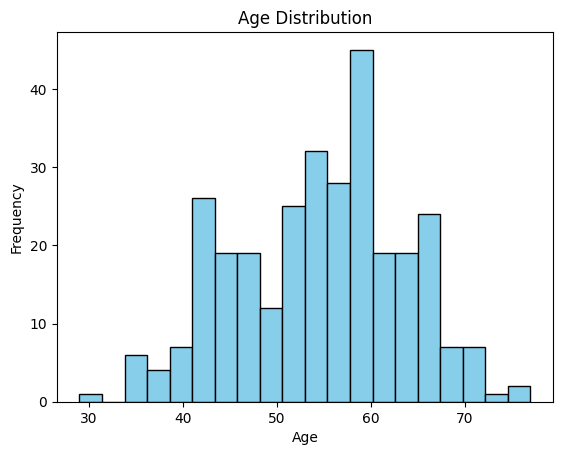

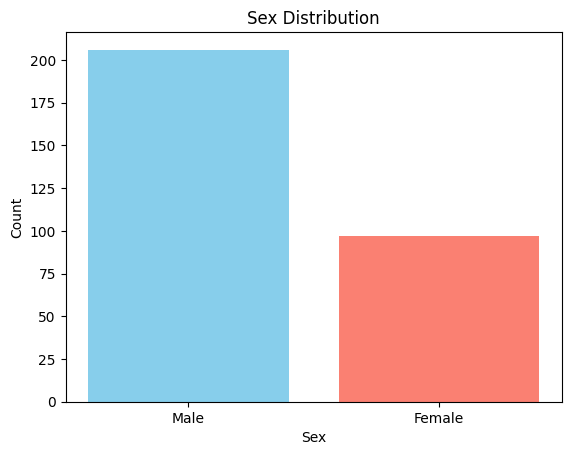

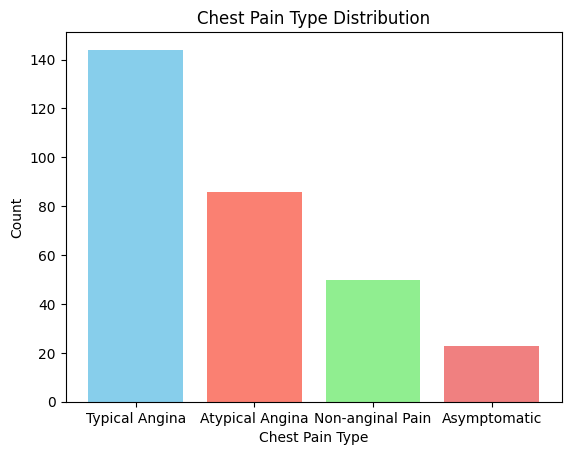

target
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64
0    160
1    137
Name: count, dtype: int64


In [110]:
# Load Heart Disease Dataset
heart = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])

# Show age demographic
plt.hist(heart['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# Show sex demographic
plt.bar(['Male', 'Female'], heart['sex'].value_counts(), color=['skyblue', 'salmon'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Distribution')
plt.show()

# Show cp type
plt.bar(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'], heart['cp'].value_counts(), color=['skyblue', 'salmon', 'lightgreen', 'lightcoral'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Chest Pain Type Distribution')
plt.show()

# Replace '?' with NaN (missing values)
heart.replace('?', np.nan, inplace=True)

# Convert the dataset to numeric values, coercing errors into NaNs
heart = heart.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
heart.dropna(inplace=True)

# input/output feature split
X_heart = heart.drop('target', axis=1)
y_heart = heart['target']

# Binarizer
print('=' * 25)
print(y_heart.value_counts())
encoder = Binarizer()
y_heart = encoder.fit_transform(y_heart.values.reshape(-1, 1))
print('=' * 25)
print(pd.Series(y_heart.flatten()).value_counts())

# Scaler
scaler_heart = StandardScaler()
X_heart = scaler_heart.fit_transform(X_heart)

# train test split
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.3, random_state=42)



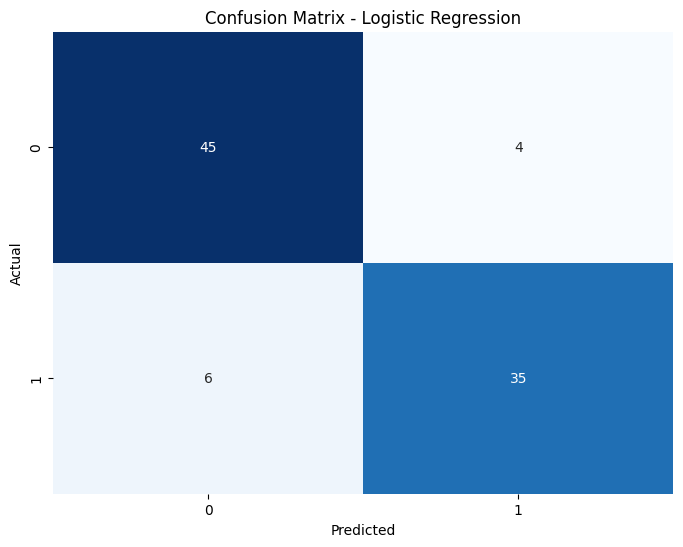

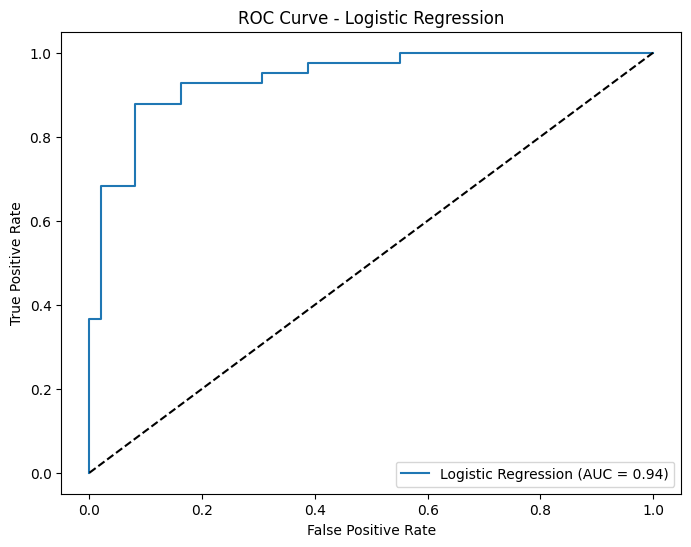

=== Logistic Regression (Heart) ===
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        49
           1       0.90      0.85      0.88        41

    accuracy                           0.89        90
   macro avg       0.89      0.89      0.89        90
weighted avg       0.89      0.89      0.89        90

--------------------------------------------------


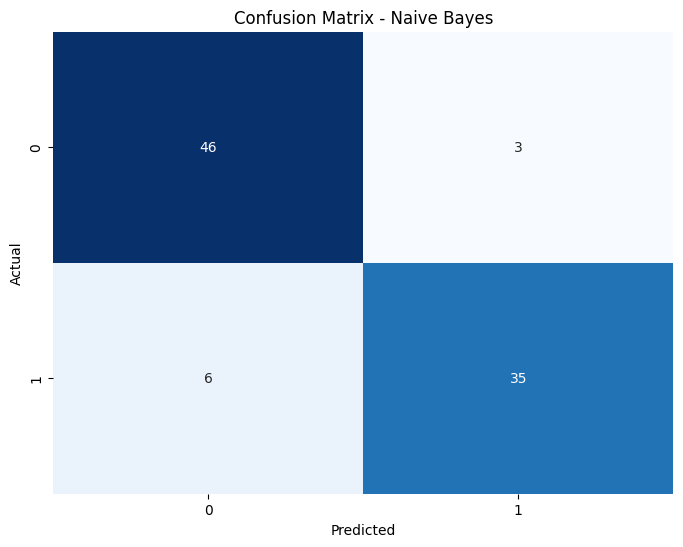

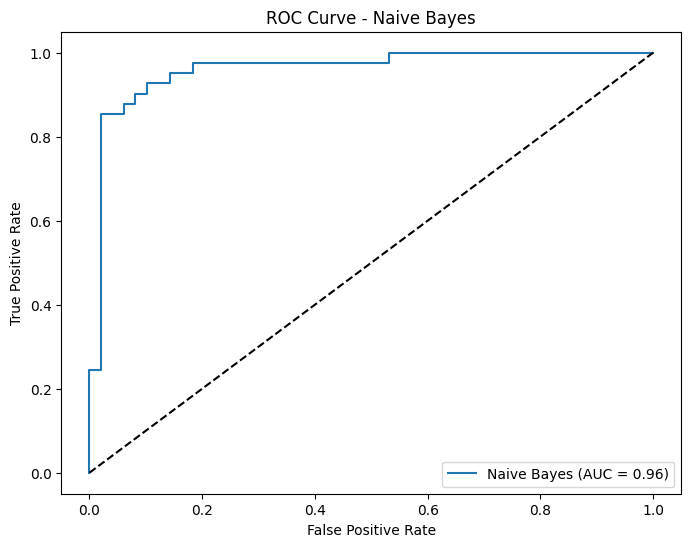

=== Naive Bayes (Heart) ===
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        49
           1       0.92      0.85      0.89        41

    accuracy                           0.90        90
   macro avg       0.90      0.90      0.90        90
weighted avg       0.90      0.90      0.90        90

--------------------------------------------------


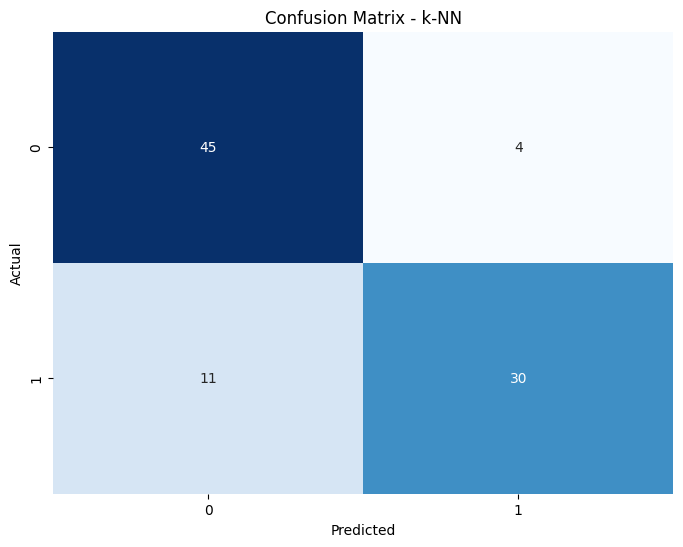

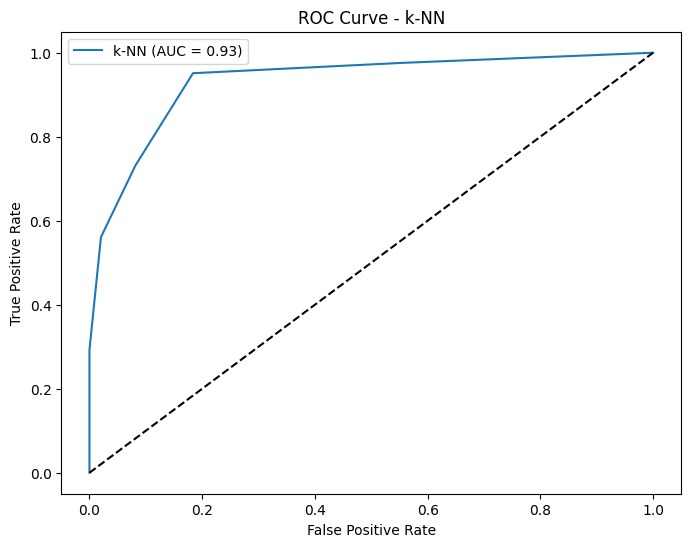

=== k-NN (Heart) ===
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        49
           1       0.88      0.73      0.80        41

    accuracy                           0.83        90
   macro avg       0.84      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90

--------------------------------------------------


In [111]:
# Train model without gridsearch
train_models(X_train_heart, X_test_heart, y_train_heart, y_test_heart, "Heart", use_grid=False)

Best parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Best score for Logistic Regression: 0.8308943089430894


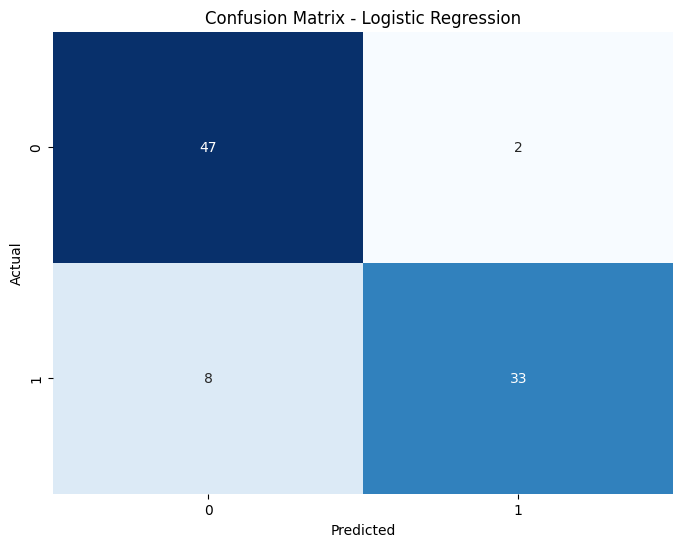

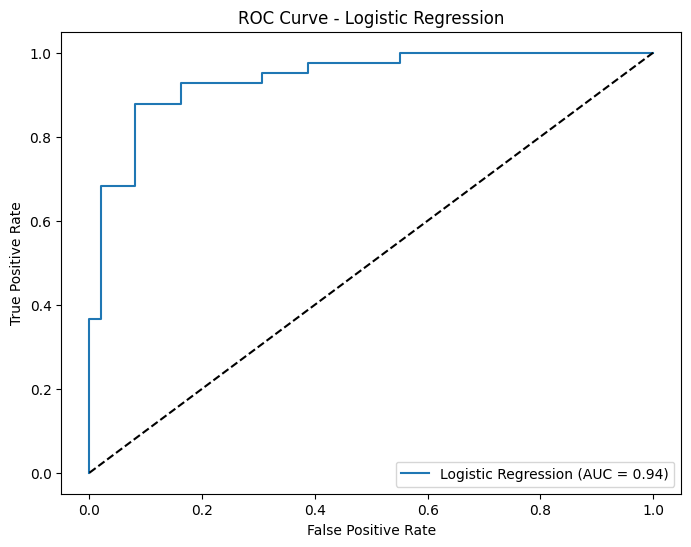

=== Logistic Regression (Heart) ===
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        49
           1       0.94      0.80      0.87        41

    accuracy                           0.89        90
   macro avg       0.90      0.88      0.89        90
weighted avg       0.89      0.89      0.89        90

--------------------------------------------------
Best parameters for Naive Bayes: {'var_smoothing': 1e-09}
Best score for Naive Bayes: 0.8067363530778164


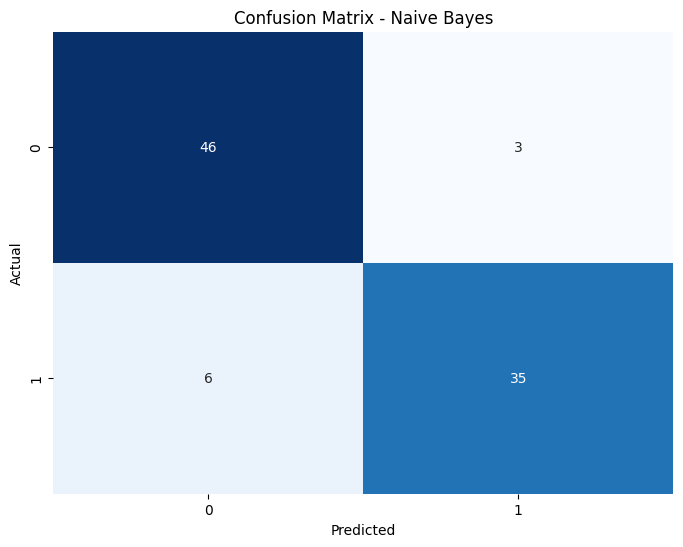

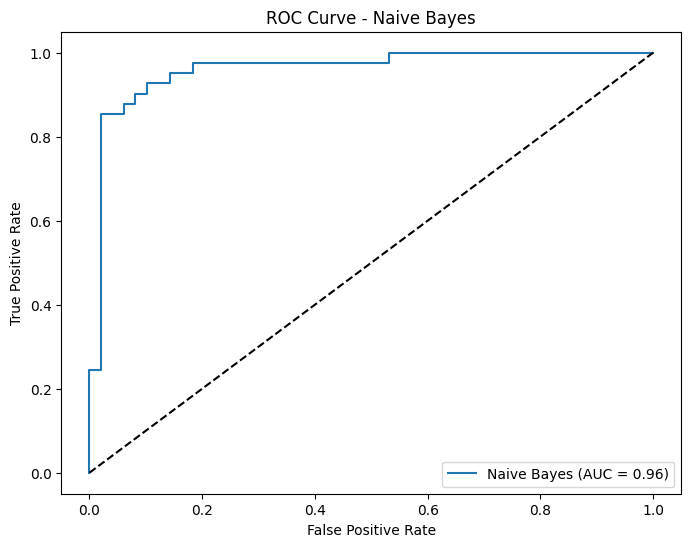

=== Naive Bayes (Heart) ===
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        49
           1       0.92      0.85      0.89        41

    accuracy                           0.90        90
   macro avg       0.90      0.90      0.90        90
weighted avg       0.90      0.90      0.90        90

--------------------------------------------------
Best parameters for k-NN: {'n_neighbors': 13}
Best score for k-NN: 0.8311265969802555


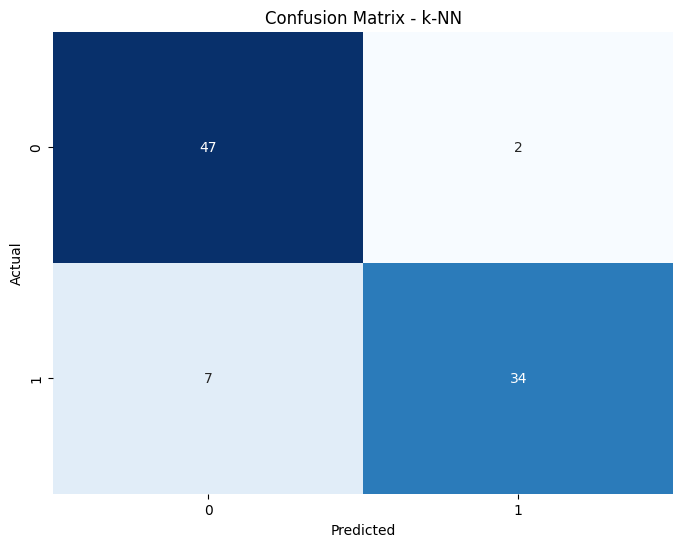

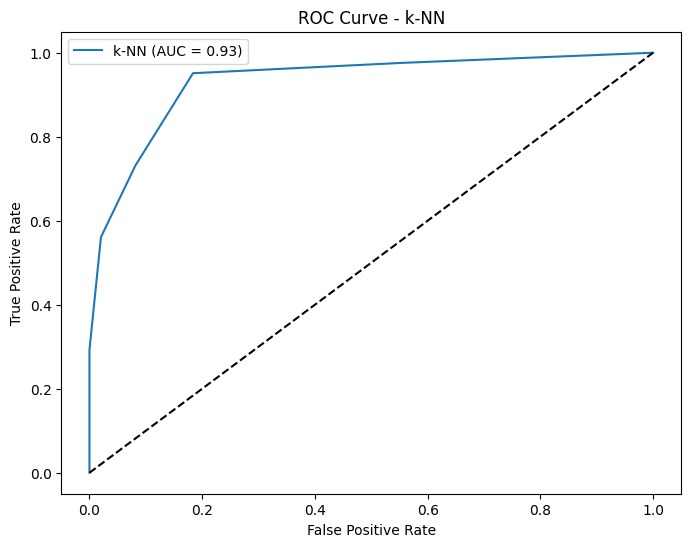

=== k-NN (Heart) ===
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        49
           1       0.94      0.83      0.88        41

    accuracy                           0.90        90
   macro avg       0.91      0.89      0.90        90
weighted avg       0.90      0.90      0.90        90

--------------------------------------------------


In [103]:
# Train model with gridsearch
train_models(X_train_heart, X_test_heart, y_train_heart, y_test_heart, "Heart", use_grid=True)